## Importing Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import cv2

In [3]:
oilspill = os.listdir(r"C:\Users\kenny\Desktop\DataScience Related Affair\Oil spill-data\Spill_Data\OilSpill")
print(oilspill[:10]) #the output we get are the .jpg files

nospill = os.listdir(r"C:\Users\kenny\Desktop\DataScience Related Affair\Oil spill-data\Spill_Data\NoSpill")
print('\n')
print(nospill[:10])

['Oilspill_001.jpg', 'Oilspill_002.jpg', 'Oilspill_003.jpg', 'Oilspill_004.jpg', 'Oilspill_005.jpg', 'Oilspill_006.jpg', 'Oilspill_007.jpg', 'Oilspill_008.jpg', 'Oilspill_009.jpg', 'Oilspill_010.jpg']


['NoSpill_001.jpg', 'NoSpill_002.jpg', 'NoSpill_003.jpg', 'NoSpill_004.jpg', 'NoSpill_005.jpg', 'NoSpill_006.jpg', 'NoSpill_007.jpg', 'NoSpill_008.jpg', 'NoSpill_009.jpg', 'NoSpill_010.jpg']


## Data Preprocessing

In [4]:
data = []
labels = []
for img in oilspill:
    try:
        img_read = plt.imread(r"C:\Users\kenny\Desktop\DataScience Related Affair\Oil spill-data\Spill_Data\OilSpill" + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_aray=img_array/255
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in nospill:
    try:
        img_read = plt.imread(r"C:\Users\kenny\Desktop\DataScience Related Affair\Oil spill-data\Spill_Data\NoSpill" + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

In [5]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42)

In [7]:
y_train = np_utils.to_categorical(y_train,  2)
y_test = np_utils.to_categorical(y_test,  2)

In [8]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (268, 50, 50, 3)
Shape of testing image : (68, 50, 50, 3)
Shape of training labels : (268, 2)
Shape of testing labels : (68, 2)


## Architecture of the CNN model

In [9]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [10]:
inputShape= (50,50,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [12]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [13]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 268 samples, validate on 68 samples
Epoch 1/10
268/268 [==============================] - 19s 72ms/step - loss: 0.2468 - acc: 0.9030 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 2/10
268/268 [==============================] - 9s 34ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.2531e-04 - val_acc: 1.0000
Epoch 3/10
268/268 [==============================] - 7s 25ms/step - loss: 3.2456e-04 - acc: 1.0000 - val_loss: 2.6266e-05 - val_acc: 1.0000
Epoch 4/10
268/268 [==============================] - 8s 32ms/step - loss: 3.5982e-04 - acc: 1.0000 - val_loss: 8.7576e-06 - val_acc: 1.0000
Epoch 5/10
268/268 [==============================] - 8s 31ms/step - loss: 1.4272e-05 - acc: 1.0000 - val_loss: 7.8715e-06 - val_acc: 1.0000
Epoch 6/10
268/268 [==============================] - 8s 31ms/step - loss: 9.1058e-04 - acc: 1.0000 - val_loss: 6.2852e-06 - val_acc: 1.0000
Epoch 7/10
268/268 [==============================] - 8s 32ms/step - loss: 1.3273e-04 - acc: 1.0000 - val_loss: 1.2850e-

In [14]:
print(H.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


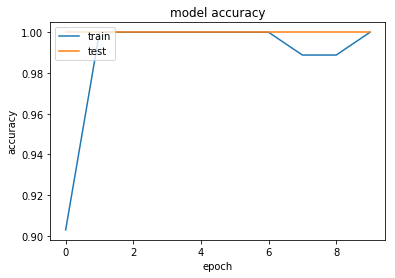

In [15]:
# summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

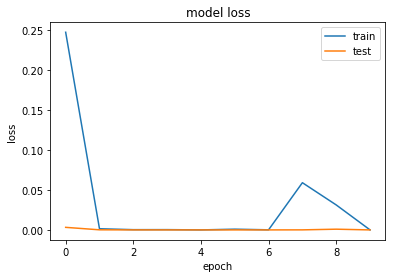

In [16]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [17]:
# make predictions on the test set
preds = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

1.0


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        44

   micro avg       1.00      1.00      1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[24  0]
 [ 0 44]]


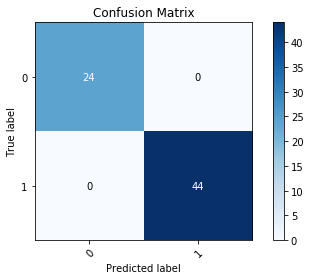

In [21]:
class_names=np.array((0,1))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')